<h2> 🕵🏻 Anomaly Detection in 📈 Multivariate ⏳ Time-Series </h2>

* Resolved Data Anomalies/Outliers in 3 different Multivariate Time Series Data Sets related to [**Health Care**](https://www.kaggle.com/code/vijeetnigam26/anomaly-detection-ecg-autoencoders), [**Tourism**](https://www.kaggle.com/code/vijeetnigam26/anomaly-detection-expedia-hotel), and [**Transportation Sectors**](https://www.kaggle.com/code/vijeetnigam26/anomaly-detection-sensors-var).
* Implemented and Compared **ANN, VAR, Isolation forests, K-Means Clustering, PCA,** and **SVM** to get the best model accuracy.
* Built an efficient **Autoencoders** Model with an accuracy of **94.96%**.
* Applied Neural Networks and Deep Learning Methods for detecting anomalies.

# 1️⃣ Problem Statement 1: ECG 🏥

**The objective of detecting anomalies in ECG signals consists of finding the irregular heart rates, heartbeats, and rhythms. To achieve this goal, an anomaly detection system must be able to find them on all heartbeat sequences; therefore, to obtain the essential metrics.**

An electrocardiogram (ECG) is a simple test that can be used to check your heart's rhythm and electrical activity. Sensors attached to the skin are used to detect the electrical signals produced by your heart each time it beats.


<img src="https://img.freepik.com/premium-photo/patient-monitor-showing-vital-signs-ecg-ekg-vector-illustration_42416-358.jpg?w=1060" height=75% width=75% style="margin-left:12.5%;">

<h3>Autoencoders</h3>

Autoencoder is an important application of Neural Networks or Deep Learning. It is widely used in dimensionality reduction, image compression, image denoising, and feature extraction. It is also applied in anomaly detection and has delivered superior results.

This notebook uses autoencoders for detecting anomaly in ECG(electro cardiogram) readings. 
This is one of the very good practical application of autoencoders. 

[**Reference**](https://www.kaggle.com/code/devavratatripathy/ecg-anomaly-detection-using-autoencoders/notebook)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

👉🏻 **Note:** The dataset has 140 columns which represents the ECG readings and a labels column which has been encoded to **0 or 1** showing whether the ECG is **abnormal or normal**.

In [3]:
#separate the data and labels so that it will be easy for understanding
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

<h3>Normalizing the data to the range [0-1]</h3>

<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/05/Normalization-Formula.jpg" height="55%" width="55%" style="margin-left: 22.5%;">

In [5]:
#Now lets Normalize the data
#First we will calculate the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

2023-01-05 19:10:04.642402: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


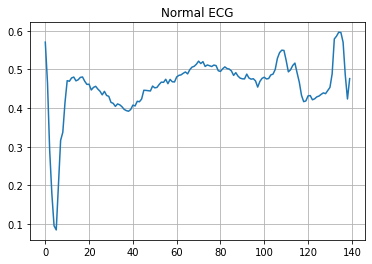

In [7]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

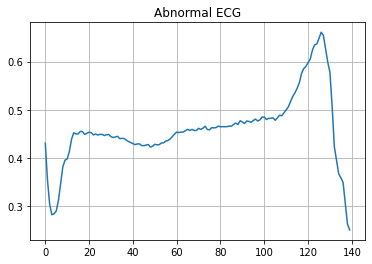

In [8]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# 1.1 Autoencoders 

Autoencoders are a specific type of feedforward neural network.

It consists of two parts:-
1.Encoder
2.Decoder

<img src="https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" height=80% width=80% style="margin-left:10%">

# 1.2 Analysis 📝

<h3> ❓ How the model will detect anomaly ?</h3>

We will create an encoder and a decoder using an ANN architecture. We are going to provide the ECG data as input and the model will try to reconstruct it. The error between the original data and reconstructed output will be called the **reconstruction error**. Based on this recostruction error we are going to classify an ECG as anomalous or not.In order to do this we are going to train the model only on the normal ECG data but it will be tested on the full test set, so that when an abnormal ECG is provided in the input the autoencoder will try to reconstruct it but since it has been only trained on normal ECG data the output will have a larger reconstruction error. We will also define a minimum threshold for the error i.e. if the reconstruction error is above the threshold then it will be categorised as anomalous. 


For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional representation, then decodes it back to an image. It learns to compress the data while minimizing the reconstruction error. 

<img src="https://static.packt-cdn.com/products/9781789344158/graphics/assets/e8c5f6fa-9522-4fc2-b1a8-f10d4e451148.png" height=80% width=80% style="margin-left:10%">

👉🏻 *In simple words, AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data.* 

In [9]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

👉🏻 **NOTE**: See that in fit() both the data are same i.e. n_train_data, the reason is that we will be comparing the original ECG with the reconstructed one to calculate the reconstruction error.
Autoencoders are unsupervised learning models but here we are training them using supervised method so its more like they are used as **self-supervised**.  

In [10]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

2023-01-05 19:10:05.531451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
5/5 [==============================] - 1s 48ms/step - loss: 0.0571 - val_loss: 0.0552
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0538 - val_loss: 0.0512
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0496 - val_loss: 0.0468
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0452 - val_loss: 0.0423
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0407 - val_loss: 0.0379
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0367 - val_loss: 0.0344
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0335 - val_loss: 0.0316
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0310 - val_loss: 0.0294
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0290 - val_loss: 0.0276
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0273 - val_loss: 0.0262
Epoch 11/20
5/5 [============

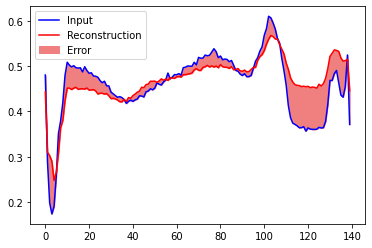

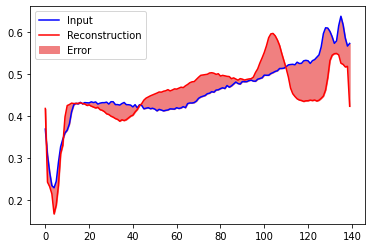

In [11]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

👉🏻 As I mentioned earlier an ECG is anomalous if it is greater than a threshold. We can set the threshold in any way we want. Here I am going to set it to one standard deviation from the mean of normal training data.

In [12]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  return tf.math.less(loss, threshold)
print(t)

0.030792654


In [13]:
pred = prediction(autoencoder, n_test_data, t)
print(pred)

tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

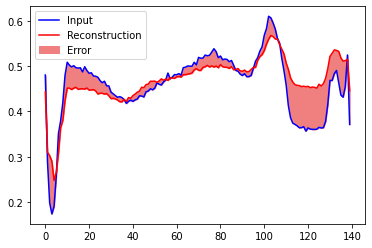

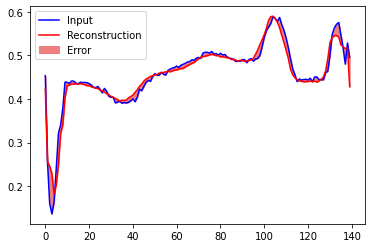

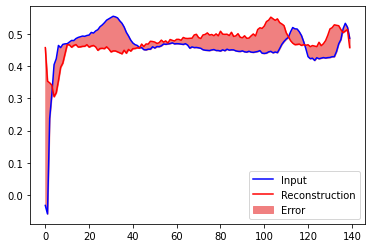

In [14]:
#Lets see some more result visually !!
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)

This model was just the basic model and it can be improved by doing hyperparameter tuning and making the encoder and decoder with DNN. 
The threshold was determined using a very simple method and it can be also changed for getting better and more accurate results. The criteria for determinig the threshold can make a lot of difference.

# 1.3 Accuracy 🎯

Out of **2359** Actual Shape of Prediction, **2240** were predicted correctly. 
This results in accuracy ≈ **94.96 %**


In [15]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)
preds = tf.math.less(train_loss, threshold)
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=2232>

In [16]:
preds.shape

TensorShape([2359])

In [17]:
acc = 2240/2359*100
print("Accuracy = ", acc, "%")

Accuracy =  94.95548961424333 %


<h2> 🕵🏻 Anomaly Detection: Expedia Hotel 🏨  </h2>

<img src="https://assets.materialup.com/uploads/132da5cf-4213-43fa-961a-b133e0b5f80d/preview.gif" height=98% width=98% style="margin-left:1%">

# 2️⃣ Problem Statement 2: Expedia Hotel 🏨

<img src="https://s27.q4cdn.com/708721433/files/images/new-logos/image-(10).png" height=50% width=50% style="margin-left:25%; display:inline;">

The [**Dataset**](https://www.kaggle.com/competitions/expedia-personalized-sort) is related to tourism sector and is multivariate, dependent on time series. The main objective here is to check and observe the hotel prices from the data set of expedia hotel search. I have implemented different models here to check the prices hikes and lows. 

[**Reference**](https://www.kaggle.com/code/bimimi/time-series-anomaly-detection)

In [18]:
import seaborn as sns 
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
plt.style.use(['default'])

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D

# !pip install pyemma
# from pyemma import msm
# %matplotlib inline

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/expedia-personalized-sort/testOrderBenchmark.zip
/kaggle/input/expedia-personalized-sort/data.zip
/kaggle/input/expedia-personalized-sort/basicPythonBenchmark.zip
/kaggle/input/expedia-personalized-sort/randomBenchmark.zip
/kaggle/input/expedia-hotel/train.csv
/kaggle/input/expedia-hotel/test.csv
/kaggle/input/mts-trail-west-of-i-90-bridge/mts-trail-west-of-i-90-bridge.csv


In [19]:
train = pd.read_csv('/kaggle/input/expedia-hotel/train.csv')
# ('/kaggle/input/expedia-hotel/train.csv')

In [20]:
train.head()

srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \
0                3                3.5  ...                      NaN   
1                4                4.0  ...                      NaN   
2                3                4.5  ...                      NaN   
3                2                4.0  ...                      NaN   
4                4                3.5  ...                      NaN   

   comp7_rate  comp7_inv  comp7_rate_percent_diff  comp8_rate  comp8_inv  \
0         NaN        NaN                      NaN         0.0        0.0   
1         NaN        NaN                      NaN         0.0        0.0   
2         NaN        NaN                      NaN         0.0        0.0   
3         NaN        NaN                      NaN        -1.0        0.0   
4         NaN        NaN                      NaN         0.0        0.0   

   comp8_rate_percent_diff  click_bool  gross_bookings_usd  booking_bool  
0                      NaN           0                 NaN             0  
1                      NaN           0                 NaN             0  
2                      NaN           0                 NaN             0  
3                      5.0           0                 NaN             0  
4                      NaN           0                 NaN             0  

[5 rows x 54 columns]

In [21]:
train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

<h2> Data Set : Expedia Hotel </h2>

<img src="https://cdn.dribbble.com/users/3195127/screenshots/15901369/dribbble_4x.png" height=98% width=98% style="margin-left:1%">

*“Hotel” refers to hotels, apartments, B&Bs, hostels and other properties appearing on Expedia’s websites.  Room types are not distinguished and the data can be assumed to apply to the least expensive room type. Most of the data are for searches that resulted in a purchase, but a small proportion are for searches not leading to a purchase. So, the main objective is to check the prices of Hotel Rooms.*

Selecting property / visitor location country / srch_room_count with the most Data Points 

In [22]:
# prop_id corresponding to 
train['prop_id'].value_counts()

104517    4733
124342    4707
68420     4580
134154    4550
40279     4535
          ... 
115966       1
130054       1
131174       1
125775       1
102926       1
Name: prop_id, Length: 136886, dtype: int64

In [23]:
train['visitor_location_country_id'].value_counts()

219    5778805
100     990487
55      580072
216     434568
220     350433
        ...   
144         31
198         30
146         30
24          29
8           27
Name: visitor_location_country_id, Length: 218, dtype: int64

In [24]:
# Num of rooms specified in search by customer
train['srch_room_count'].value_counts()

1    9045780
2     734315
3      92372
4      25023
5       8053
8       4950
6       4345
7       2692
Name: srch_room_count, dtype: int64

In [25]:
# Subset df 
df = train.loc[train['prop_id'] == 104517]

df = df.loc[df['visitor_location_country_id'] == 219]

df = df.loc[df['srch_room_count'] == 1]

# srch_saturday = if stay includes Sat night 
# srch_booking_window = num of days between search date and hotel stay start date 
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 2041 to 9917395
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time                 3049 non-null   object 
 1   price_usd                 3049 non-null   float64
 2   srch_booking_window       3049 non-null   int64  
 3   srch_saturday_night_bool  3049 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 119.1+ KB


In [27]:
df.describe()

price_usd  srch_booking_window  srch_saturday_night_bool
count  3049.000000          3049.000000               3049.000000
mean    112.939023            37.082650                  0.524434
std     113.374049            46.160272                  0.499485
min       0.120000             0.000000                  0.000000
25%      67.000000             6.000000                  0.000000
50%     100.000000            20.000000                  1.000000
75%     141.000000            48.000000                  1.000000
max    5584.000000           292.000000                  1.000000

In [28]:
train.loc[(train['price_usd'] == 5584) & 
         (train['visitor_location_country_id'] == 219)]

srch_id            date_time  site_id  visitor_location_country_id  \
2905344   195154  2013-04-07 20:59:07        5                          219   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
2905344                      NaN                   NaN              219   

         prop_id  prop_starrating  prop_review_score  ...  \
2905344   104517                4                4.0  ...   

         comp6_rate_percent_diff  comp7_rate  comp7_inv  \
2905344                      NaN         NaN        NaN   

         comp7_rate_percent_diff  comp8_rate  comp8_inv  \
2905344                      NaN        -1.0        0.0   

         comp8_rate_percent_diff  click_bool  gross_bookings_usd  booking_bool  
2905344                     28.0           0                 NaN             0  

[1 rows x 54 columns]

👉🏻 Possible wrong search, no intention to book

In [29]:
# Removing 5584 
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    3048.000000
mean      111.144055
std        55.055161
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max       536.000000
Name: price_usd, dtype: float64

In [30]:
df['date_time'].min(), df['date_time'].max()

('2012-11-01 02:48:30', '2013-06-30 22:50:21')

In [31]:
df['date_time'].describe()

df['date_time'] = pd.to_datetime(df['date_time'])

df.head()

date_time  price_usd  srch_booking_window  \
2041  2013-03-14 11:27:28      206.0                   99   
3152  2013-01-03 20:48:24      186.0                    6   
5166  2013-01-19 16:51:27       61.0                    1   
10135 2013-01-26 11:34:23       72.0                  116   
10560 2013-04-29 09:39:50      246.0                  245   

       srch_saturday_night_bool  
2041                          1  
3152                          0  
5166                          0  
10135                         0  
10560                         0

In [32]:
import matplotlib.pyplot as plt
import plotly.express as px

In [33]:
fig = px.scatter(df, x=df.columns[0], y=df.columns[1], height=500, width=1200, template='plotly_white')
fig.update_layout(
    title="Time series of room price by date of search",
    yaxis_title="USD",
    xaxis_title="Dates",
    )

In [34]:
df.head()

date_time  price_usd  srch_booking_window  \
2041  2013-03-14 11:27:28      206.0                   99   
3152  2013-01-03 20:48:24      186.0                    6   
5166  2013-01-19 16:51:27       61.0                    1   
10135 2013-01-26 11:34:23       72.0                  116   
10560 2013-04-29 09:39:50      246.0                  245   

       srch_saturday_night_bool  
2041                          1  
3152                          0  
5166                          0  
10135                         0  
10560                         0

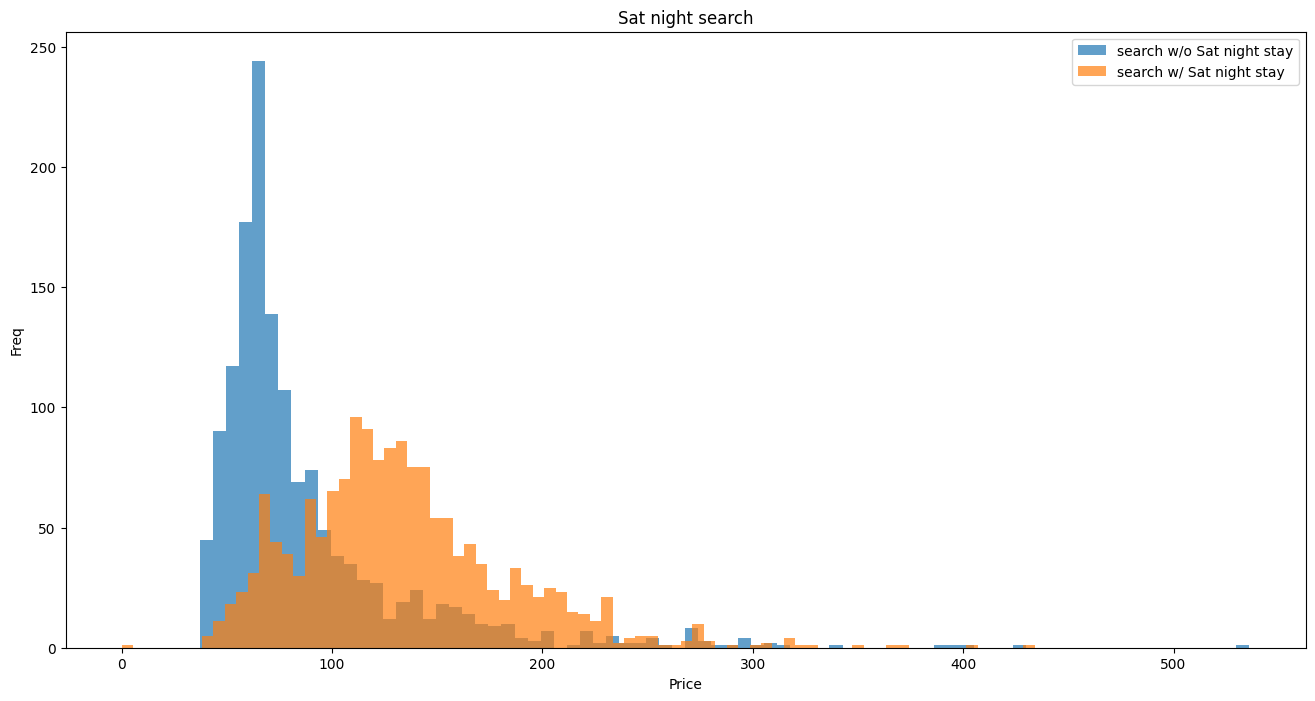

In [35]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.7, 
         label = 'search w/o Sat night stay')

plt.hist(b, bins = 80, 
         alpha = 0.7, 
         label = 'search w/ Sat night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Sat night search')
plt.plot();

In [36]:
df['srch_saturday_night_bool'].value_counts()

1    1599
0    1449
Name: srch_saturday_night_bool, dtype: int64

In [37]:
print('Kurtosis: %f' % df['price_usd'].kurt())
print('Skewness: %f' % df['price_usd'].skew())

Kurtosis: 3.617559
Skewness: 1.443641


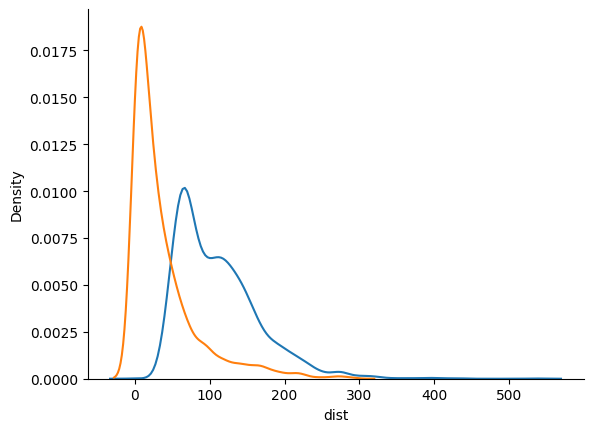

In [38]:
plt.style.use(['default']) 
sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

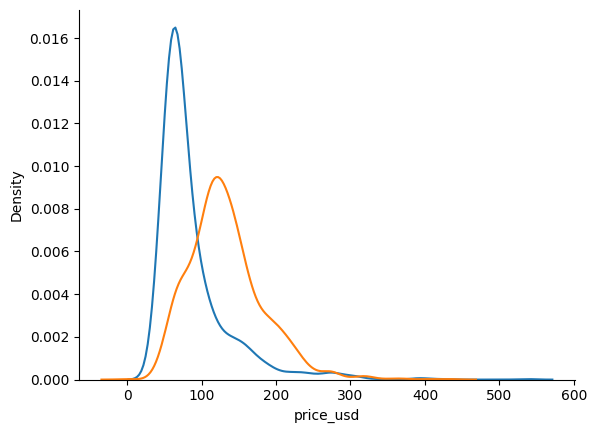

In [39]:
sns.distplot(a, hist = False, rug = False)
sns.distplot(b, hist = False, rug = False)

sns.despine()

In [40]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)

<h2> Cluster-based models </h2>

* K-Means
* Isolation forest
* Clustering

<h3>Potential outliers</h3>

* usd
* srch_booking_window (days between search and first stay date)
* srch_saturday (stay includes sat night

# 2.1 K-Means

This method looks at the data points in a dataset and groups those that are similar into a predefined number K of clusters. A threshold value can be added to detect anomalies: if the distance between a data point and its nearest centroid is greater than the threshold value, then it is an anomaly.

<img src="https://www.gatevidyalay.com/wp-content/uploads/2020/01/K-Means-Clustering.png" height=80% width=80% style="margin-left:10%">

In [41]:
# Determine optimal cluster num using elbow method 
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

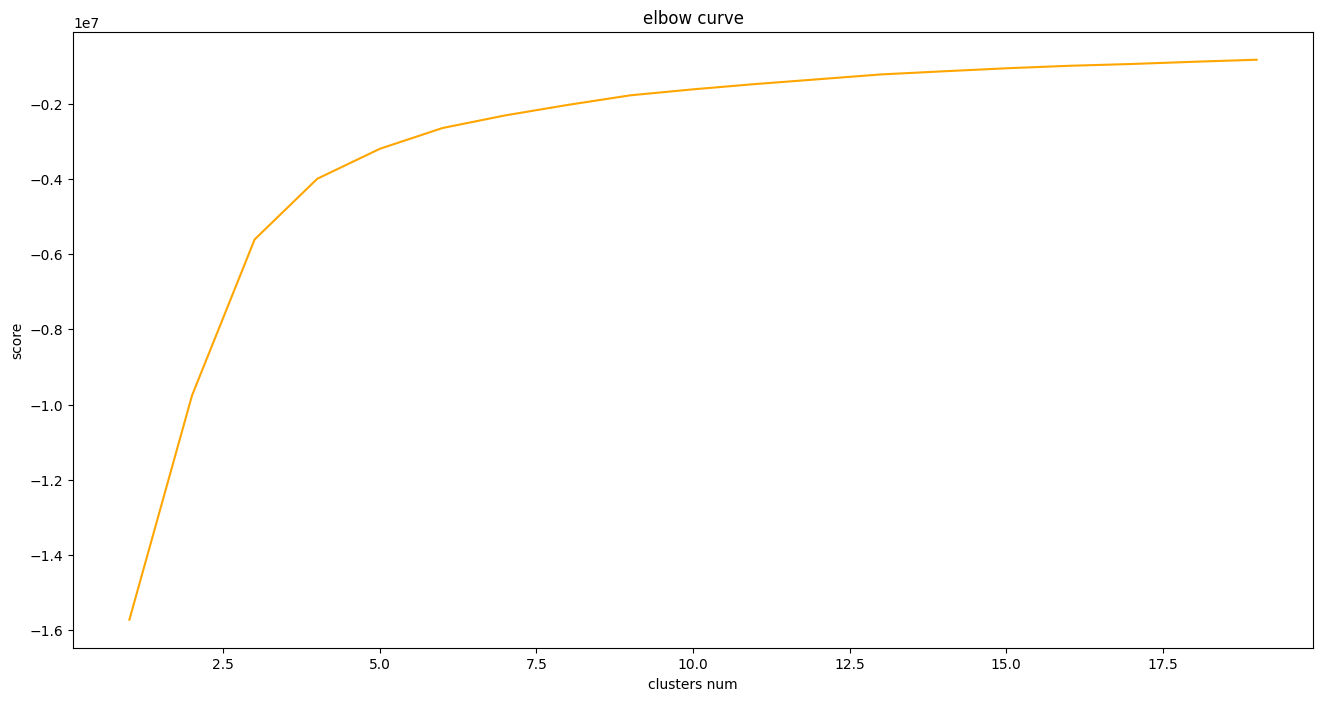

In [42]:
# elbow curve 
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'orange')

plt.xlabel('clusters num')
plt.ylabel('score')
plt.title('elbow curve')
plt.show();

👉🏻 Setting n_clusters to 7

> n_clusters > 7 = additional clusters do not explain greater variance in variable 
> 
> *where **variable = price_usd**.*

In [43]:
# k means output 
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop = True)

km = KMeans(n_clusters = 7)
km.fit(X)
km.predict(X)

labels = km.labels_

X.head()

price_usd  srch_booking_window  srch_saturday_night_bool
0       84.0                   19                         0
1       78.0                   16                         1
2      114.0                   56                         1
3       76.0                   56                         1
4      128.0                    0                         1

# 2.2 3D Clusters 
Plotting using K-Means O/P 

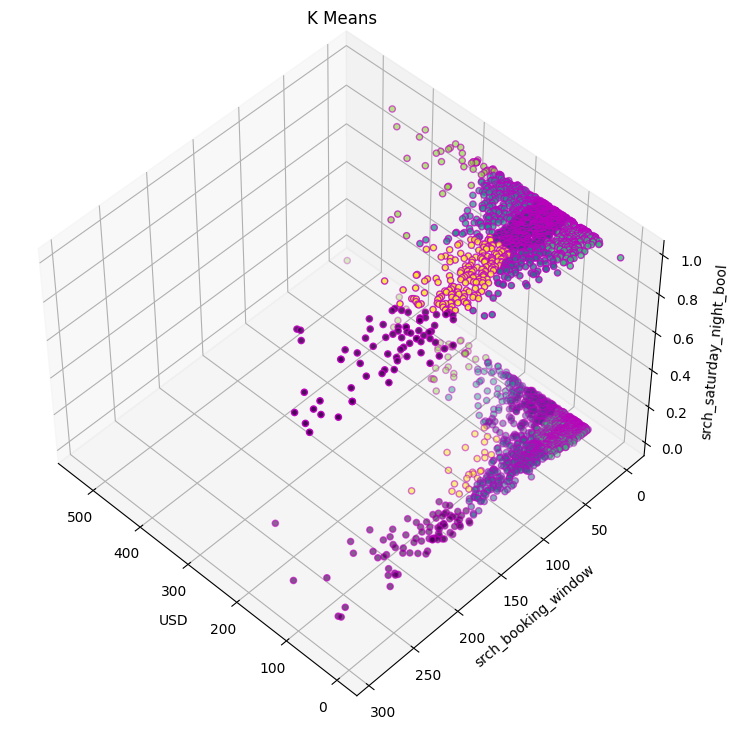

In [44]:
fig = plt.figure(1, figsize = (7, 7))

ax = Axes3D(fig, rect = [0, 0, 0.95, 1], 
            elev = 48, azim = 134)

ax.scatter(X.iloc[:, 0], 
           X.iloc[:, 1], 
           X.iloc[:, 2],
           c = labels.astype(np.float), edgecolor = 'm')

ax.set_xlabel('USD')
ax.set_ylabel('srch_booking_window')
ax.set_zlabel('srch_saturday_night_bool')

plt.title('K Means');

In [45]:
import pylab as pl 

# 2.3 PCA 

The PCA-Based Anomaly Detection component solves the problem by analyzing available features to determine what constitutes a "normal" class. The component then applies distance metrics to identify cases that represent anomalies. This approach lets you train a model by using existing imbalanced data.

<img src="https://static-02.hindawi.com/articles/scn/volume-2021/7389943/figures/7389943.fig.005.jpg" height=80% width=80% style="margin-left:10%">

In [46]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

X = data.values
X_std = StandardScaler().fit_transform(X)

# Calc eigenvec cor & eig_vals of covar matrix 
mean_vec = np.mean(X_std, axis = 0)

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# eig_val,eig_vecs tuple
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse = True)

In [47]:
# Calc explained var from eig_vals 
total = sum(eig_vals)

# Individual explained var 
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]

# Cumulative explained var 
cum_var_exp = np.cumsum(var_exp)

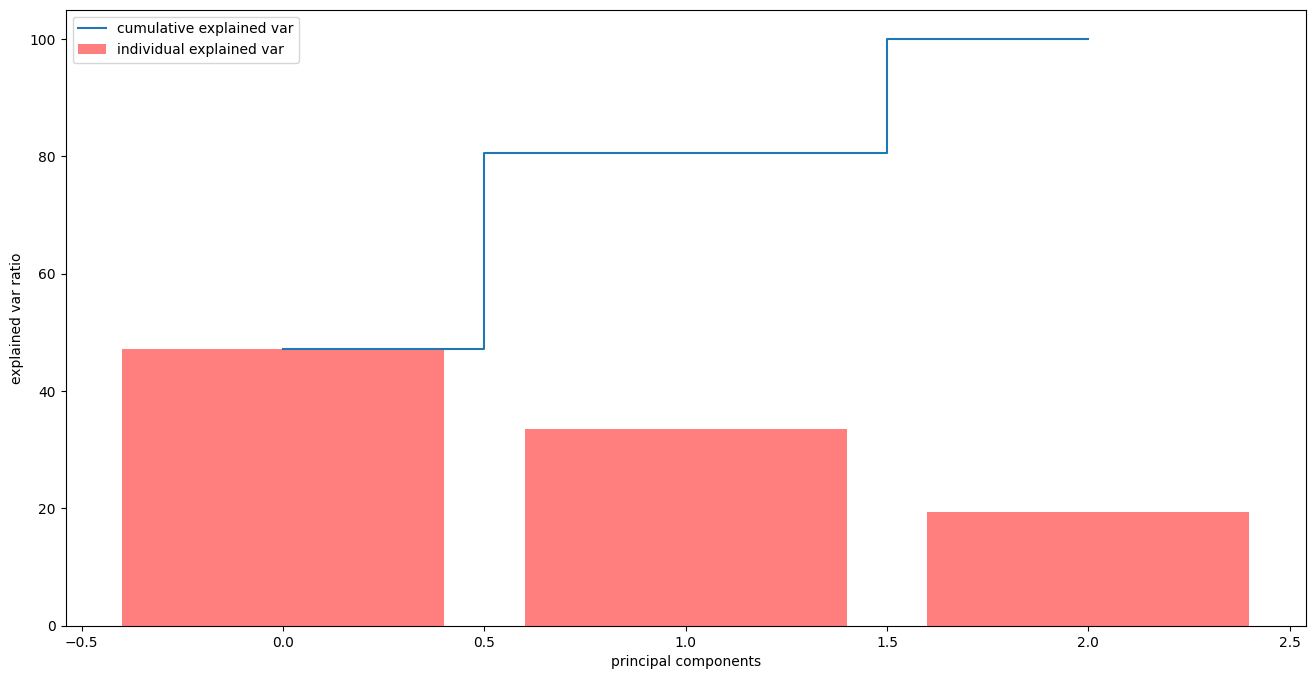

In [48]:
plt.figure(figsize = (16, 8))
plt.bar(range(len(var_exp)), var_exp, 
        alpha = 0.5, align = 'center', 
        label = 'individual explained var', 
        color = 'r'
       )

plt.step(range(len(cum_var_exp)), cum_var_exp,
         where = 'mid',
         label = 'cumulative explained var')

plt.xlabel('principal components')
plt.ylabel('explained var ratio')
plt.legend(loc = 'best')
plt.show();

👉🏻 Component 

> **1** = explains approx 50% of var
> 
> **2** = explains < 40
> 
> **3** = explains < 20 

Components 1 + 2 = explain approx 80% of var 

* set n_components = 2

* standardize features 

In [49]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

# Standardize features
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)

# Reduce components to 2 
pca = PCA(n_components = 2)
data = pca.fit_transform(data)

# Standardize 2 new features 
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [50]:
kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]

df['cluster'] = kmeans[7].predict(data)
df.index = data.index

df['pc1'] = data[0]
df['pc2'] = data[1]
df['cluster'].value_counts()

0    840
2    718
6    444
5    390
4    341
3    150
7     97
1     68
Name: cluster, dtype: int64

In [51]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

In [52]:
outliers_fraction = 0.01

distance = getDistanceByPoint(data, kmeans[9])
outlier_num = int(outliers_fraction * len(distance))

threshold = distance.nlargest(outlier_num).min()

df['anomaly'] = (distance >= threshold).astype(int)

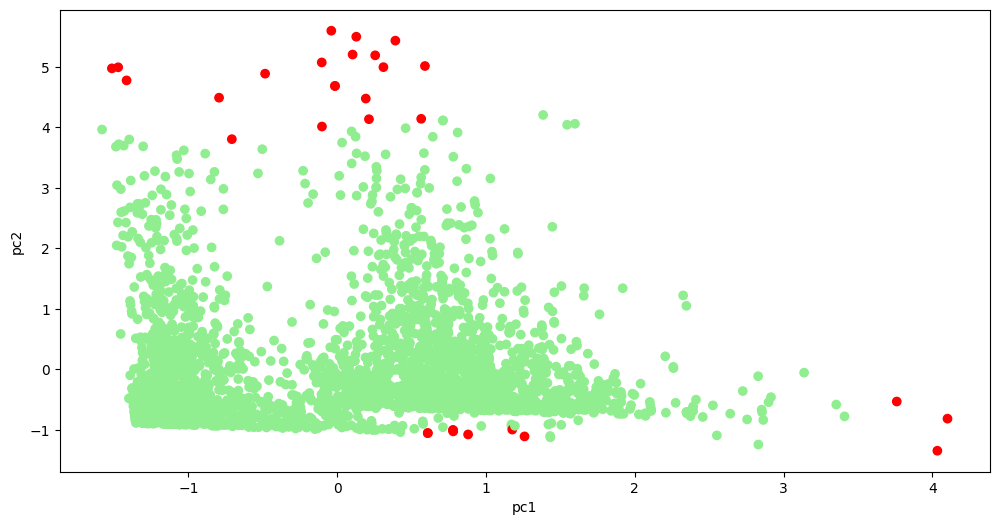

In [53]:
fig, ax = plt.subplots(figsize = (12, 6))

colors = {0:'lightgreen', 1:'red'}

ax.scatter(df['pc1'], df['pc2'], 
           c = df['anomaly'].apply(lambda x: colors[x]))

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show();

In [54]:
df = df.sort_values('date_time')
df['date_time'] = df.date_time.astype(np.int64)

# object with anomalies
a = df.loc[df['anomaly'] == 1, 
           ['date_time_int', 'price_usd']]

a

date_time_int  price_usd
79    1352307775000000000      126.0
203   1353254473000000000      116.0
416   1354869170000000000      126.0
650   1356457553000000000      273.0
700   1356642192000000000      236.0
701   1356644486000000000      236.0
731   1356867809000000000      280.0
734   1356878699000000000      220.0
737   1356884528000000000      220.0
852   1357657004000000000      245.0
1005  1358444151000000000      102.0
1140  1359377578000000000       87.0
1157  1359523443000000000      112.0
1278  1360489270000000000       58.0
1441  1361549975000000000      122.0
1817  1363761630000000000       78.0
1831  1363811183000000000      102.0
1928  1364473640000000000      153.0
1948  1364679638000000000       66.0
1951  1364722176000000000       84.0
1957  1364751067000000000       84.0
1973  1364920263000000000      404.0
2004  1365180577000000000      102.0
2021  1365337277000000000      236.0
2096  1365880377000000000       72.0
2242  1366838075000000000      142.0
2280  1367228390000000000      246.0
2457  1368561390000000000      536.0
2560  1369236899000000000       62.0
2867  1371367527000000000      434.0
3036  1372425746000000000       98.0

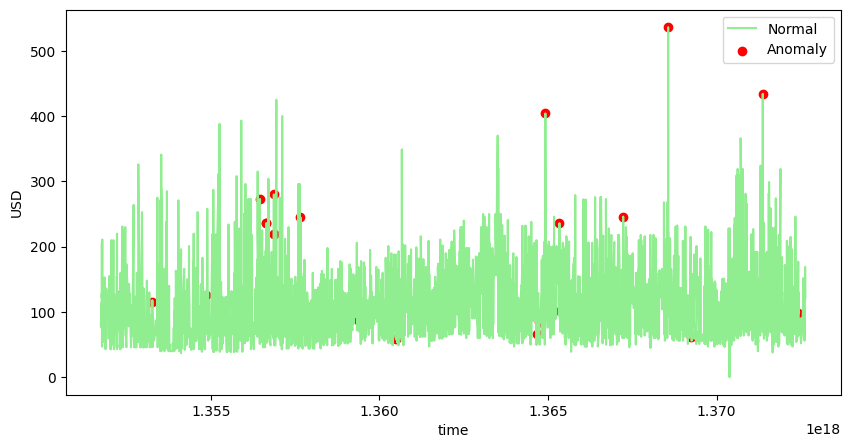

In [55]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(df['date_time_int'], df['price_usd'], 
        color = 'lightgreen', label = 'Normal')

ax.scatter(a['date_time_int'], a['price_usd'],
           color = 'red', label = 'Anomaly')

plt.xlabel('time')
plt.ylabel('USD')
plt.legend()
plt.show();

In [56]:
df['anomaly'].unique()

array([0, 1])

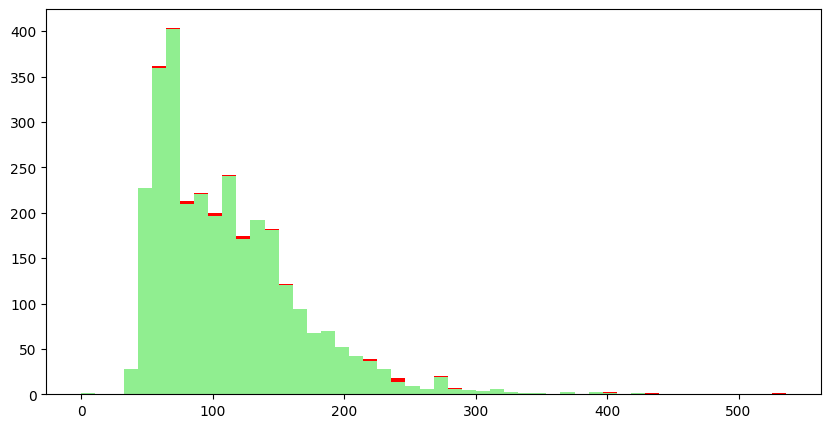

In [57]:
a = df.loc[df['anomaly'] == 0, 'price_usd']
b = df.loc[df['anomaly'] == 1, 'price_usd']

fig, axs = plt.subplots(figsize = (10, 5))
axs.hist([a, b], 
         bins = 50, stacked = True, 
         color = ['lightgreen', 'red'])

plt.show();

In [58]:
df.anomaly.value_counts()

0    3017
1      31
Name: anomaly, dtype: int64

In [59]:
df.head()

date_time  price_usd  srch_booking_window  \
0  1351738110000000000       84.0                   19   
1  1351739203000000000       78.0                   16   
2  1351760658000000000      114.0                   56   
3  1351761063000000000       76.0                   56   
4  1351764925000000000      128.0                    0   

   srch_saturday_night_bool        date_time_int  cluster       pc1       pc2  \
0                         0  1351738110000000000        0 -0.889864 -0.521900   
1                         1  1351739203000000000        2  0.230566 -0.272218   
2                         1  1351760658000000000        5  0.567439  0.546642   
3                         1  1351761063000000000        5  0.155659  0.581776   
4                         1  1351764925000000000        2  0.793675 -0.659305   

   anomaly  
0        0  
1        0  
2        0  
3        0  
4        0

# 2.4 Isolation Forest

Detect anomalies based on data points that are few and different 

- No use of density / distance measure 
    i.e. different from clustering based / distanced based algorithms 

- Randomly select a feature 
    
- Randomly select a split between max and min values of selected feature 
    
- Length of path, avged over a forest of random trees = measure of normality 

- Random partitioning = shorter path for anomalies

- If forest produces shorter paths for samples, then they are likely to be anomalies 

In Isolation forest on the left.. we can isolate an anomalous point from the rest of the data with just one line, while the normal point on the right requires four lines to isolate completely.

<img src="https://miro.medium.com/max/1400/1*6GFMewU1Aax57nsW2uSakQ.png" height=80% width=80% style="margin-left:10%">

Isolation Forest Algorithm takes advantage of the following properties of anomalous samples - 

> Fewness — anomalous samples are a minority and there will only be a few of them in any dataset.
> 
> Different — anomalous samples have values/attributes that are very different from those of normal samples.
> 

<img src="https://engineering.linkedin.com/content/dam/engineering/site-assets/images/blog/posts/2019/08/IsolationForest1.png" height=70% width=70% style="margin-left:15%">

We can see, Outliers are easier to isolate, while Inliers are harders to isolate..

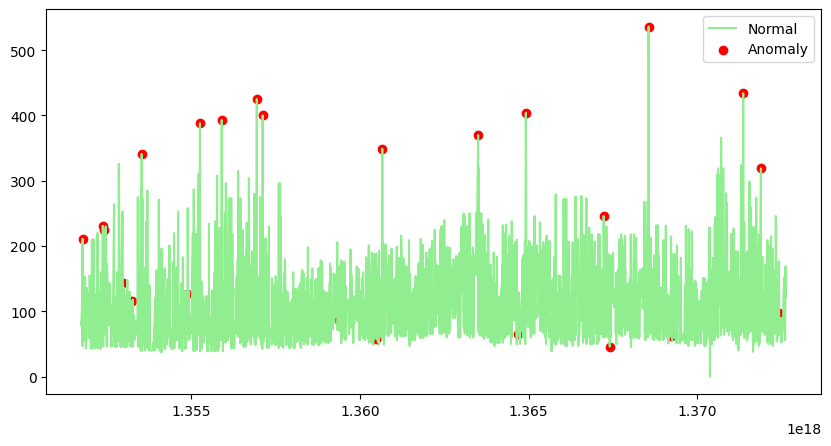

In [60]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

data = pd.DataFrame(np_scaled)

# Isolation forest 
outliers_fraction = 0.01
ifo = IsolationForest(contamination = outliers_fraction)

ifo.fit(data)

df['anomaly1'] = pd.Series(ifo.predict(data))

fig, ax = plt.subplots(figsize = (10, 5))

a = df.loc[df['anomaly1'] == -1, ['date_time_int', 'price_usd']]

ax.plot(df['date_time_int'], df['price_usd'], 
        color = 'lightgreen', label = 'Normal')

ax.scatter(a['date_time_int'], a['price_usd'], 
           color = 'red', label = 'Anomaly')

plt.legend()
plt.show();

In [61]:
df['anomaly1'].unique()

array([ 1, -1])

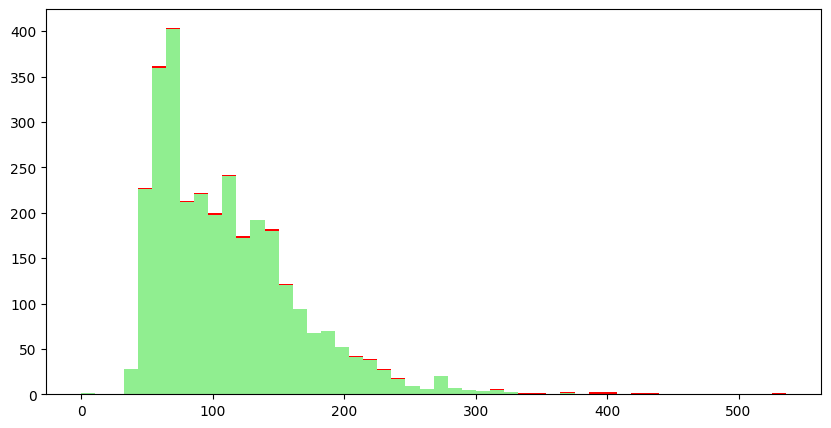

In [62]:
a = df.loc[df['anomaly1'] == 1, 'price_usd']
b = df.loc[df['anomaly1'] == -1, 'price_usd']

fig, ax = plt.subplots(figsize = (10, 5))

ax.hist([a, b],
        bins = 50, stacked = True, 
        color = ['lightgreen', 'red'] )

plt.show();

<h2> Support vector machine models </h2>

Associated with supervised learning 
- One class SVM
- Gaussian distribution 
- Markov chain

<img src="https://documentation.mindsphere.io/MindSphere/apis/analytics-anomalydetection/images/DBSCAN.png" height=70% width=70% style="margin-left:15%">

# 2.5 One class SVM 
- Unsupervised Anomaly Detection Method
- Estimate support of high dimensional distribution

In [63]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

data = pd.DataFrame(np_scaled)

# Train 

osvm = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)

osvm.fit(data)

df['anomaly2'] = pd.Series(osvm.predict(data))

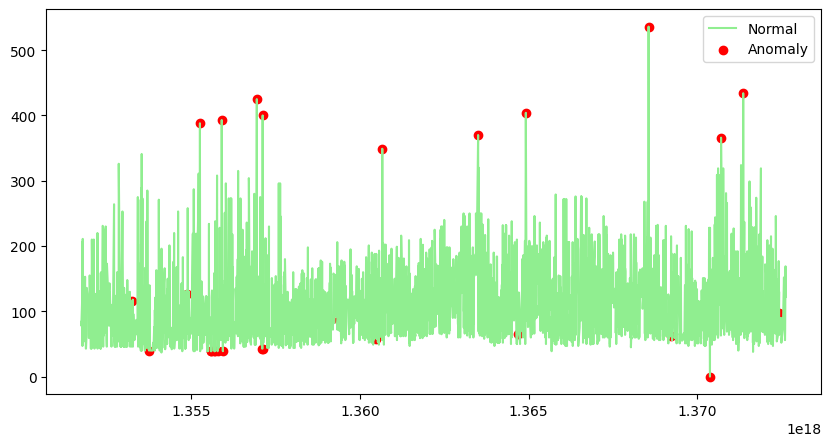

In [64]:
fig, ax = plt.subplots(figsize = (10, 5))

a = df.loc[df['anomaly2'] == -1, 
           ['date_time_int', 'price_usd']]

ax.plot(df['date_time_int'], df['price_usd'], 
        color = 'lightgreen', 
        label = 'Normal')

ax.scatter(a['date_time_int'], a['price_usd'], 
           color = 'red', 
           label = 'Anomaly')

plt.legend()
plt.show();

In [65]:
df.head()

date_time  price_usd  srch_booking_window  \
0  1351738110000000000       84.0                   19   
1  1351739203000000000       78.0                   16   
2  1351760658000000000      114.0                   56   
3  1351761063000000000       76.0                   56   
4  1351764925000000000      128.0                    0   

   srch_saturday_night_bool        date_time_int  cluster       pc1       pc2  \
0                         0  1351738110000000000        0 -0.889864 -0.521900   
1                         1  1351739203000000000        2  0.230566 -0.272218   
2                         1  1351760658000000000        5  0.567439  0.546642   
3                         1  1351761063000000000        5  0.155659  0.581776   
4                         1  1351764925000000000        2  0.793675 -0.659305   

   anomaly  anomaly1  anomaly2  
0        0         1         1  
1        0         1         1  
2        0         1         1  
3        0         1         1  
4        0         1         1

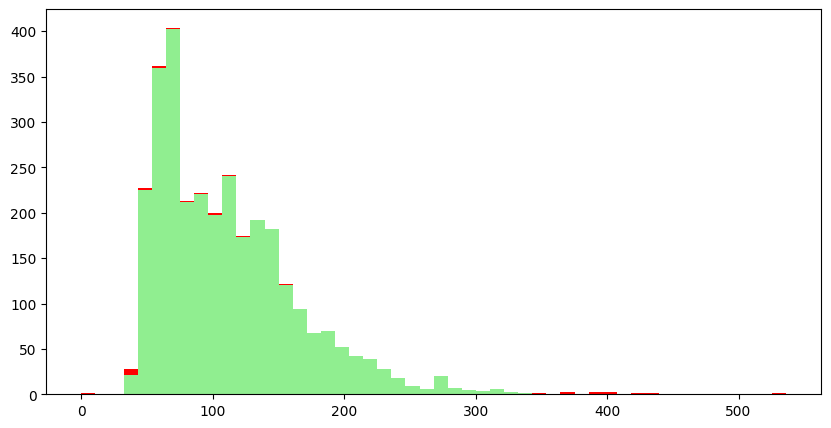

In [66]:
a = df.loc[df['anomaly2'] == 1, 'price_usd']
b = df.loc[df['anomaly2'] == -1, 'price_usd']

fig, ax = plt.subplots(figsize = (10, 5))

ax.hist([a, b], bins = 50, 
        stacked = True, color = ['lightgreen','red'])

plt.show();

In [67]:
df['anomaly2'].value_counts()

 1    3017
-1      31
Name: anomaly2, dtype: int64

# 2.6 Gaussian Distribution

<img src="https://miro.medium.com/max/800/1*w5HzgB5ekxQ6Nwmx5ggn8Q.jpeg" height=70% width=70% style="margin-left:15%">

- Assume data is normally distributed

- Use covariance.EllipticEnvelope from scikit-learn to find key params of general distribution by assuming entire dataset = an expression of an underlying multivariate Gaussian distribution

Creating two dfs based on categories defined by sat boolean

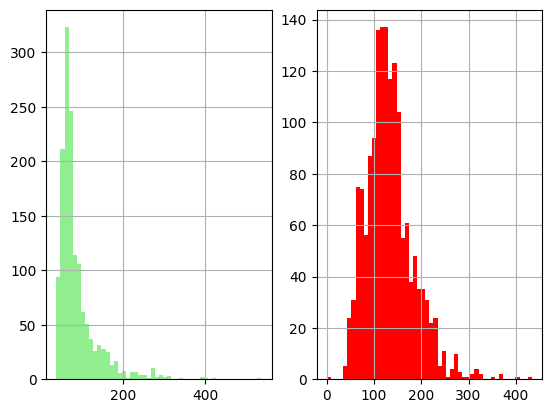

In [68]:
df_class0 = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
df_class1 = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

fig, axs = plt.subplots(1, 2)

df_class0.hist(ax = axs[0], bins = 50, color = 'lightgreen')
df_class1.hist(ax = axs[1], bins = 50, color = 'red');

Apply EllipticEnvelope to each category 

Set contamination param (proportion of outliers present in dataset)

Use decision function to compute decision function of given observations (equivalent to shifted Mahalanobis distances. 

Threshold for identifying as outliers = 0 (compatible with other detection algorithms)

predict(x_train) predict labels of X_train according to fitted model

1 = normal
-1 = anomaly

In [69]:
envelope = EllipticEnvelope(contamination = outliers_fraction)

x_train = df_class0.values.reshape(-1, 1)
envelope.fit(x_train)

df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(x_train)
df_class0['anomaly'] = envelope.predict(x_train)

In [70]:
envelope = EllipticEnvelope(contamination = outliers_fraction)

x_train = df_class1.values.reshape(-1, 1)
envelope.fit(x_train)

df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(x_train)
df_class1['anomaly'] = envelope.predict(x_train)

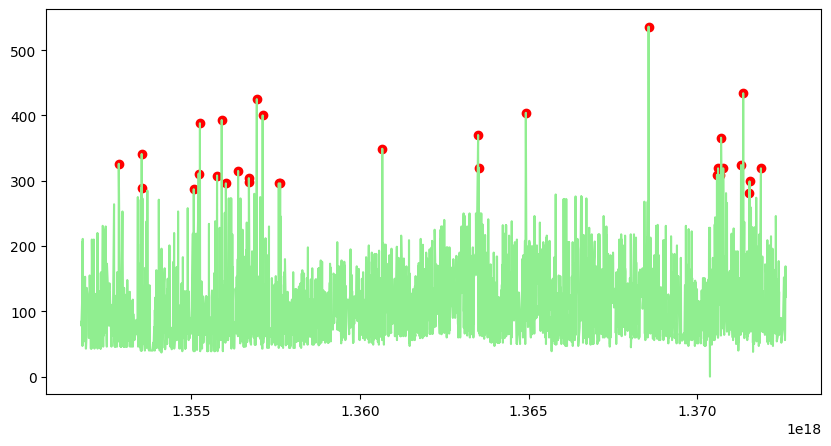

In [71]:
df_class = pd.concat([df_class0, df_class1])
df['anomaly3'] = df_class['anomaly']

fig, ax = plt.subplots(figsize = (10, 5))

a = df.loc[df['anomaly3'] == -1, 
           ('date_time_int', 'price_usd')]

ax.plot(df['date_time_int'], df['price_usd'], 
        color = 'lightgreen')

ax.scatter(a['date_time_int'], a['price_usd'],
          color = 'red')

plt.show();

In [72]:
df['anomaly3'].value_counts()

 1    3017
-1      31
Name: anomaly3, dtype: int64

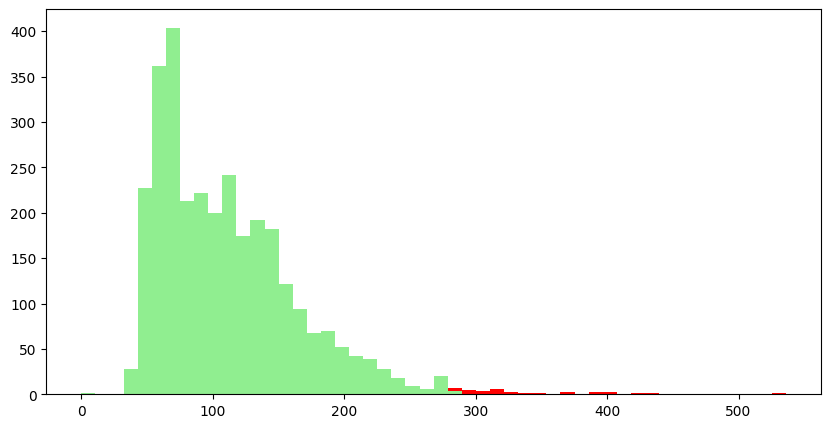

In [73]:
a = df.loc[df['anomaly3'] == 1, 'price_usd']
b = df.loc[df['anomaly3'] == -1, 'price_usd']

fig, ax = plt.subplots(figsize = (10, 5))
ax.hist([a, b], 
        bins = 50, stacked = True, 
        color = ['lightgreen', 'red'])

plt.show();

# 2.7 Analysis 📝

👉🏻 Based on this study, we have observed that Algorithms - **K-Means, 3D Cluster, PCA, Isolation Forest, and Gaussian Distribution** have detected the **high prices**.
<!-- <br><b
<img src="https://jonmgomes.com/wp-content/uploads/2020/05/Comp_1.gif" height=60% width=60% style="margin-left:20%"> -->
<!-- <br><br> -->
👉🏻 But only **One Class SVM** has detected both high prices as well as **low prices**.
<br>
<h3>❓ BUT.. How one class svm made such difference?</h3>

SVM is for novelty detection, a max-margin methods, i.e. they do not model a probability distribution... The idea of novelty detection is to detect rare events, i.e. events that happen rarely, and hence, of which you have very little samples. 
    <br><br>
<img src="https://cdn.dribbble.com/users/2828066/screenshots/14755895/media/eac02ec5ba9d0118c3d289d52dbb20ff.gif" height=98% width=98% style="margin-left:1%">

<h2> 🕵🏻 Anomaly Detection: Sensors | VAR </h2>

<br>

<img src="https://www.outsideonline.com/wp-content/uploads/2019/09/03/bikers-and-peds_h.jpg" height=98% width=98% style="margin-left:1%">

# 3️⃣ Problem Statement 3: Sensors🚦

Detect the outliers/anomalies in the experimental dataset. The dataset stores hourly counting series detected by sensors. These sensors count both people riding bikes and pedestrians. Separate volumes are tallied for each travel mode. Wires in a diamond formation in the concrete detect bikes and an infrared sensor mounted on a wooden post detects pedestrians.


[**Reference**](https://towardsdatascience.com/anomaly-detection-in-multivariate-time-series-with-var-2130f276e5e9)

In [74]:
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR

import warnings
warnings.simplefilter('ignore')

<h2> Data Set </h2> 

Using a **modified dataset version** of [Seattle Burke Gilman Trail](https://www.kaggle.com/datasets/city-of-seattle/seattle-burke-gilman-trail) (i.e. hosted by the city of Seattle which is part of its open data project). 

The dataset stores hourly counting series detected by sensors. These sensors count both people riding bikes and pedestrians. Separate volumes are tallied for each travel mode. Wires in a diamond formation in the concrete detect bikes and an infrared sensor mounted on a wooden post detects pedestrians.

<img src="https://storage.googleapis.com/static.modelplace.ai/production/model-previews/openvino_person_vehicle_bike_detection_crossroad.gif" height=98% width=98% style="margin-left:1%">

In [75]:
### READ DATA ###

train_hours = 80*7*24  # weeks x hours x days
test_hours = 15*7*24  # weeks x hours x days

df = pd.read_csv('/kaggle/input/mts-trail-west-of-i-90-bridge/mts-trail-west-of-i-90-bridge.csv', nrows=train_hours+test_hours, parse_dates=['Date'])

print(df.shape)
df.head()

(15960, 6)


Date  MTS Trail West of I-90 Bridge Total  Ped East  \
0 2014-01-01 00:00:00                                  1.0       0.0   
1 2014-01-01 01:00:00                                  0.0       0.0   
2 2014-01-01 02:00:00                                  4.0       0.0   
3 2014-01-01 03:00:00                                  1.0       0.0   
4 2014-01-01 04:00:00                                  1.0       0.0   

   Ped West  Bike East  Bike West  
0       1.0        0.0        0.0  
1       0.0        0.0        0.0  
2       2.0        1.0        1.0  
3       1.0        0.0        0.0  
4       0.0        1.0        0.0

In [76]:
### FILL NAN ###

df['Ped East'] = df['Ped East'].groupby(df.Date.dt.hour).transform(lambda x: x.fillna(x.median()))
df['Ped West'] = df['Ped West'].groupby(df.Date.dt.hour).transform(lambda x: x.fillna(x.median()))
df['Bike East'] = df['Bike East'].groupby(df.Date.dt.hour).transform(lambda x: x.fillna(x.median()))
df['Bike West'] = df['Bike West'].groupby(df.Date.dt.hour).transform(lambda x: x.fillna(x.median()))
df['BGT West of NE 70th Total'] = df['Ped East'] + df['Ped West'] + df['Bike East'] + df['Bike West']

df['Date'] = pd.to_datetime(df['Date'].dt.date)

In [77]:
### DAILY AGGREGATION ###

df_day = pd.DataFrame()
df_day['Ped East'] = df.groupby(df.Date)['Ped East'].sum()
df_day['Ped West'] = df.groupby(df.Date)['Ped West'].sum()
df_day['Bike East'] = df.groupby(df.Date)['Bike East'].sum()
df_day['Bike West'] = df.groupby(df.Date)['Bike West'].sum()
df_day['Total'] = df.groupby(df.Date)['BGT West of NE 70th Total'].sum()

df_day.index = pd.DatetimeIndex(df_day.index.values, freq=df_day.index.inferred_freq)

In [78]:
### PLOT DAILY DATA ###
import matplotlib.pyplot as plt
import plotly.express as px

#df_day.plot(figsize=(24, 9))

fig = px.line(df, x="Date", y=df.columns[2:6], height=500, width=1200, template='plotly_white')
fig.update_layout(
    title="Examples of daily aggregated time series at our disposal",
    yaxis_title=" ",
    legend_title=" ",
    )

In total, 5 counting series are supplied. 2 related to pedestrian count, 2 related to bike count, and the total which is the sum of the previous series. There are double counters for pedestrians and bikes because two directions of travel are registered.

In [79]:
### TRAIN SPLIT ###

train = df_day[:(train_hours//24)].copy()

train.shape

(560, 5)

In [80]:
### TOTAL COUNT TRAIN AUTOCORR ###

plt.figure(figsize=(16,6), dpi= 1000)
pd.plotting.autocorrelation_plot(train['Total'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

In [81]:
### MONTHLY TRAIN MEAN ###

month_mean_train = train.groupby(train.index.month).mean()

In [82]:
### REMOVE LONG TERM SEASONALITY FROM TRAIN ###

train['Ped East'] = train.apply(lambda x: x['Ped East'] - month_mean_train['Ped East'][x.name.month], axis=1)
train['Ped West'] = train.apply(lambda x: x['Ped West'] - month_mean_train['Ped West'][x.name.month], axis=1)
train['Bike East'] = train.apply(lambda x: x['Bike East'] - month_mean_train['Bike East'][x.name.month], axis=1)
train['Bike West'] = train.apply(lambda x: x['Bike West'] - month_mean_train['Bike West'][x.name.month], axis=1)
train['Total'] = train.apply(lambda x: x['Total'] - month_mean_train['Total'][x.name.month], axis=1)

In [83]:
### TOTAL COUNT TRAIN AUTOCORR ###

plt.figure(figsize=(16,6), dpi= 1000)
pd.plotting.autocorrelation_plot(train['Total'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

Passing to a multivariate approach considering all the series and their interaction in the system.

In [84]:
### TRAIN TEST SPLIT IN MULTIVARIATE CASE ###

train_uni = train['Total'].copy()
test_uni = df_day['Total'][(train_hours//24):].copy()
test_uni = test_uni - test_uni.index.month.map(month_mean_train['Total'])

train.drop('Total', inplace=True, axis=1)

# 3.1 Vector AutoRegression

<img src="https://miro.medium.com/max/1200/0*YplXpgxXCFhf8x34.jpg" height=98% width=98% style="margin-left:1%">

VAR model is a stochastic process that represents a group of time-dependent variables as a linear function of their own past values and the past values of all the other variables in the group.
​
Here,
​
VAR training is computed as before selecting the best order minimizing AIC. The data are standardized in the same way to remove the long term seasonality. Not surprisingly the best model is a VAR(7). After testing the independence and normality of residual data, a Hotelling’s T-squared statistic can be computed to detect the early presence of anomalies:
​
<img src="https://miro.medium.com/max/640/1*lKy-CgCI4qmS9anrp1QdFw.webp" height=40% width=40% style="margin-left:30%">
​
<p style="margin-left:7%"> <i> <b> the formula for Hotelling T2. e are the estimated residuals; Sigma is the covariance matrix of e </b> </i> </p>
​
The application of the T-squared control chart is conducted in two phases: the control limit establishment phase, and the monitoring phase. The first phase focuses on obtaining model residuals so that the calculated control limit can be used in phase two for monitoring the residual process of future anomalies. The control limit for the T-squared control chart is given by:
​
<img src="https://miro.medium.com/max/828/1*404AbCeKlaRnptda26T5KQ.webp" height=50% width=50% style="margin-left:25%">
​
<p style="margin-left:35%"> <i> <b> Upper Control Limit statistic </b> </i> </p>
​


In [85]:
### FIND BEST MULTIVARIATE MODEL ###

AIC = {}
best_aic, best_order = np.inf, 0

for i in range(1,50):
    model = VAR(endog=train)
    var_result = model.fit(maxlags=i)
    AIC[i] = var_result.aic
    
    if AIC[i] < best_aic:
        best_aic = AIC[i]
        best_order = i
        
print('BEST ORDER', best_order, 'BEST AIC:', best_aic)


BEST ORDER 4 BEST AIC: 35.50551687084829


In [86]:
### TRAIN BEST MULTIVARIATE MODEL ###

var = VAR(endog=train)
var_result = var.fit(maxlags=best_order)

var_result.aic

35.50551687084829

In [87]:
### COMPUTE TRAIN T2 METRIC ###

residuals_mean = var_result.resid.values.mean(axis=0)
residuals_std = var_result.resid.values.std(axis=0)

residuals = (var_result.resid.values - residuals_mean) / residuals_std
cov_residuals = np.linalg.inv(np.cov(residuals.T))

T = np.diag((residuals).dot(cov_residuals).dot(residuals.T))

In [88]:
### COMPUTE UCL ###

m = var_result.nobs
p = var_result.resid.shape[-1]
alpha = 0.01

UCL = stats.f.ppf(1-alpha, dfn=p, dfd=m-p) *(p*(m+1)*(m-1)/(m*m-m*p))
UCL

13.510289428754227

👉🏻 Where F represents an F distribution with p and n-p degrees of freedom and alpha significance level. If T2 > UCL, then stop and investigate. The estimated Sigma obtained at the end of phase 1 (together with residuals mean and standard deviation) is used to calculate the T-squared statistic for each new observation.

In [89]:
### PLOT TRAIN T2 METRIC ###

plt.figure(figsize=(16,6), dpi= 1000)
plt.plot(train.index[best_order:], T)
plt.ylabel('T-squared')
plt.axhline(UCL, c='red', linestyle='--')

# 3.2 Analysis 📝

<img src="https://miro.medium.com/max/1400/1*dSHTs4h5NQT9vDVkj5sEGA.png" height=40% width=40% style="margin-left:30%">

VAR model extends the univariate autoregressive (AR) model by capturing the linear relations between multiple variables. For each input series, a regression is carried out. The original variables are regressed against their own lagged values and the lagged values of other variables. For our multivariate task, we take into account both bike and pedestrian series.

In a multivariate process system with the presence of serial correlation, we use VAR models to approximate the system and monitor the residuals as a serially independent series. Using a VAR to approximate a linear system is appropriate due to the physical principles of the process dynamics.

In [90]:
### TEST SPLIT IN MULTIVARIATE CASE ###

test = df_day[(train_hours//24-best_order):].copy()
test.drop('Total', inplace=True, axis=1)

test.shape

(109, 4)

In [91]:
### REMOVE LONG TERM SEASONALITY FROM TEST ###

test['Ped East'] = test.apply(lambda x: x['Ped East'] - month_mean_train['Ped East'][x.name.month], axis=1)
test['Ped West'] = test.apply(lambda x: x['Ped West'] - month_mean_train['Ped West'][x.name.month], axis=1)
test['Bike East'] = test.apply(lambda x: x['Bike East'] - month_mean_train['Bike East'][x.name.month], axis=1)
test['Bike West'] = test.apply(lambda x: x['Bike West'] - month_mean_train['Bike West'][x.name.month], axis=1)

In [92]:
### ITERATIVE PREDICTIONS ON TEST DATA ###

pred = []

for i in range(best_order, len(test)):
    
    pred.append(var_result.forecast(test.iloc[i-best_order:i].values, steps=1))
    
pred = np.vstack(pred)
pred.shape

(105, 4)

In [93]:
### COMPUTE TEST T2 METRIC ###

residuals_test = test.iloc[best_order:].values - pred
residuals_test = (residuals_test - residuals_mean) / residuals_std

T_test = np.diag((residuals_test).dot(cov_residuals).dot(residuals_test.T))

In [94]:
### PLOT TEST T2 METRIC ###

plt.figure(figsize=(16,6), dpi= 1000)
plt.plot(test.iloc[best_order:].index, T_test)
plt.ylabel('T-squared')
plt.axhline(UCL, c='red', linestyle='--')

✏️ Here, I collected the VAR residuals and used them to build a threshold alert system, which flags an alarm in case of anomalous behaviors.



